In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('../data/film.csv') #读取csv数据
df.head()  #展示前五行数据

,filmnum,filmsize,ratio,quality
0,45,106,17,6
1,44,99,15,18
2,61,149,27,10
3,41,97,27,16
4,54,148,30,8


In [3]:
x = df.iloc[:,1:4]  #选取data中的RM变量
y =df.filmnum  #设定target为y

In [4]:
# 把x、y转化为数组形式，以便于计算
x = np.array(x.values)  
y = np.array(y.values) 
#以25%的数据构建测试样本，剩余作为训练样本
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state =1)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((94, 3), (32, 3), (94,), (32,))

In [6]:
ridge= Ridge(alpha=0.1)  # 设置lambda值
ridge.fit(x_train,y_train) #使用训练数据进行参数求解

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
print('求解截距项为：',ridge.intercept_)
print('求解系数为：',ridge.coef_)

求解截距项为： 4.35314337580391
求解系数为： [ 0.37048481 -0.03831273  0.23046337]


In [9]:
y_hat = ridge.predict(x_test) #对测试集的预测
y_hat[0:9]  #打印前10个预测值

array([20.20853893, 74.31234956, 66.97821059, 50.6165136 , 50.53930114,
       44.72765631, 57.00323469, 35.55225421, 58.49957742])

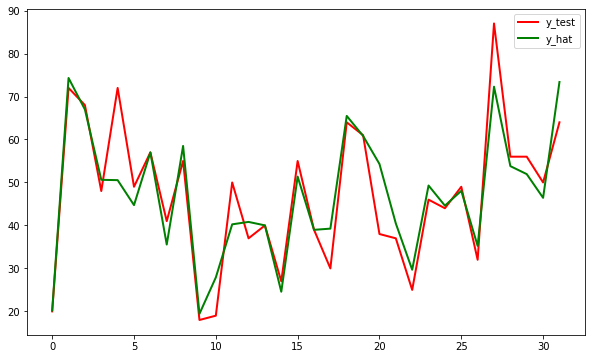

In [10]:
plt.figure(figsize=(10,6))  #设置图片尺寸
t = np.arange(len(x_test))  #创建t变量
#绘制y_test曲线
plt.plot(t, y_test, 'r', linewidth=2, label='y_test') 
#绘制y_test曲线
plt.plot(t, y_hat, 'g', linewidth=2, label='y_hat') 
plt.legend() #设置图例
plt.show()

In [12]:
# 拟合优度R2的输出方法一
print("r2:",ridge.score(x_test, y_test))
# 拟合优度R2的输出方法二
print("r2_score:",r2_score(y_test, y_hat)) 
# 用scikit-learn计算MAE
print("MAE:", metrics.mean_absolute_error(y_test, y_hat))
# 用scikit-learn计算MSE
print("MSE:", metrics.mean_squared_error(y_test, y_hat))
# # 用scikit-learn计算RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

r2: 0.8279400477123058
r2_score: 0.8279400477123058
MAE: 4.631262902381461
MSE: 46.63832870779447
RMSE: 6.829226069460175
